<a href="https://www.kaggle.com/code/masudrahman19/visualizing-russian-defense-loss-in-ukraine-2022?scriptVersionId=102410538" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🏁 Initialize Notebook

💡 This kaggle notebook illustrates direct impact on Russia as their invasion of Ukraine rages on. It is scheduled to update once per day.

**Import dependencies**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

**Set Template for Visualizations**

In [2]:
sns.set_theme(context='notebook', style='whitegrid') #set context to notebook

**Import data**

💡 This data is available on Kaggle from the following [link](https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war/versions/156)

In [3]:
df_equipment_loss = pd.read_csv("../input/2022-ukraine-russian-war/russia_losses_equipment.csv") #read in data
df_equipment_loss = df_equipment_loss.set_index("day")

In [4]:
df_personnel_loss = pd.read_csv("../input/2022-ukraine-russian-war/russia_losses_personnel.csv") #read in data
df_personnel_loss = df_personnel_loss.set_index("day")
df_personnel_loss = df_personnel_loss.drop(["personnel*"], axis=1)

# 🧹 Data Cleaning

In [5]:
df_equipment_loss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 2 to 161
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       160 non-null    object 
 1   aircraft                   160 non-null    int64  
 2   helicopter                 160 non-null    int64  
 3   tank                       160 non-null    int64  
 4   APC                        160 non-null    int64  
 5   field artillery            160 non-null    int64  
 6   MRL                        160 non-null    int64  
 7   military auto              65 non-null     float64
 8   fuel tank                  65 non-null     float64
 9   drone                      160 non-null    int64  
 10  naval ship                 160 non-null    int64  
 11  anti-aircraft warfare      160 non-null    int64  
 12  special equipment          141 non-null    float64
 13  mobile SRBM system         36 non-null     float64

In [6]:
missing_cols = list(df_equipment_loss.columns[df_equipment_loss.isnull().any()])
print("The list of columns with missing values are: ", missing_cols)

The list of columns with missing values are:  ['military auto', 'fuel tank', 'special equipment', 'mobile SRBM system', 'greatest losses direction', 'vehicles and fuel tanks', 'cruise missiles']


In [7]:
float_cols = list(df_equipment_loss.select_dtypes(include=['float64']))
print("The columns with float data are: ", float_cols)

The columns with float data are:  ['military auto', 'fuel tank', 'special equipment', 'mobile SRBM system', 'vehicles and fuel tanks', 'cruise missiles']


💡 The columns are considered float despite having integer data because they contain missing value in the form of NaN. We will replace the NaN values now in a 2 step loop as follows:

In [8]:
for c in float_cols: 
    df_equipment_loss[c] = df_equipment_loss[c].fillna(0, limit=1)
    df_equipment_loss[c] = df_equipment_loss[c].fillna(method='ffill').astype(np.int64)

In [9]:
df_equipment_loss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 2 to 161
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   date                       160 non-null    object
 1   aircraft                   160 non-null    int64 
 2   helicopter                 160 non-null    int64 
 3   tank                       160 non-null    int64 
 4   APC                        160 non-null    int64 
 5   field artillery            160 non-null    int64 
 6   MRL                        160 non-null    int64 
 7   military auto              160 non-null    int64 
 8   fuel tank                  160 non-null    int64 
 9   drone                      160 non-null    int64 
 10  naval ship                 160 non-null    int64 
 11  anti-aircraft warfare      160 non-null    int64 
 12  special equipment          160 non-null    int64 
 13  mobile SRBM system         160 non-null    int64 
 14  greatest l

💡 Columns 'military auto' and 'fuel tank' have missing values from the date of May 1, 2022. They have been added to 'vehicles and fuel tanks' as one category from thereon. We can clean up the data by combining these 2 deprecated columns into the new column for the previous dates as well.

In [10]:
df_equipment_loss['vehicles and fuel tanks'] = df_equipment_loss[['military auto','fuel tank', 'vehicles and fuel tanks']].sum(axis=1)
df_equipment_loss['vehicles and fuel tanks']

day
2       160
3       190
4       190
5       351
6       365
       ... 
157    2889
158    2902
159    2912
160    2914
161    2922
Name: vehicles and fuel tanks, Length: 160, dtype: int64

💡 Mobile SRBM System - has not been tracked since 2022-05-01; joined into Cruise Missiles. Similar to the previous step, we will also combine these two.

In [11]:
df_equipment_loss['cruise missiles'] = df_equipment_loss[['mobile SRBM system','cruise missiles']].sum(axis=1)
df_equipment_loss['cruise missiles']

day
2        0
3        0
4        0
5        0
6        0
      ... 
157    178
158    178
159    178
160    178
161    184
Name: cruise missiles, Length: 160, dtype: int64

In [12]:
df_equipment_loss = df_equipment_loss.drop(['mobile SRBM system', 'military auto','fuel tank'], axis=1)

In [13]:
df_personnel_loss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 2 to 161
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       160 non-null    object 
 1   personnel  160 non-null    int64  
 2   POW        62 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB


💡 Since Prisoners of War column is not tracked after a certain date, we will also use forward fill to fill the remaining days.

In [14]:
df_personnel_loss['POW'] = df_personnel_loss['POW'].fillna(method='ffill').astype(np.int64)

# 📈 Visualized: How much did Russia suffer over time?

As of 2022-08-03 Russia has lost  41,350 personnels.


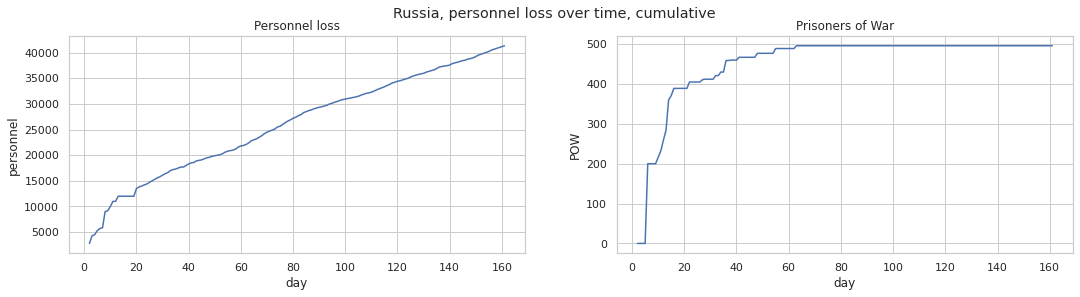

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4), sharex=True)
fig.suptitle('Russia, personnel loss over time, cumulative')

# Personnel
sns.lineplot(ax=axes[0], x=df_personnel_loss.index, y=df_personnel_loss.personnel)
axes[0].set_title('Personnel loss')

# Personnel
sns.lineplot(ax=axes[1], x=df_personnel_loss.index, y=df_personnel_loss.POW)
axes[1].set_title('Prisoners of War')

print("As of", df_personnel_loss["date"].iloc[-1], "Russia has lost ",'{:,.0f}'.format(df_personnel_loss["personnel"].iloc[-1]), "personnels.")

As of 2022-08-03 Russia has lost the following equipment: 
- 223 aircrafts
- 191 helicopters
- 1774 tanks
- 4022 APCs
- 939 field artilleries
- 259 MRLs
- 740 drones
- 15 naval ships
- 118 anti-aircraft warfares
- 83 special equipments
- 2922 vehicles and fuel tanks
- 184 cruise missiles


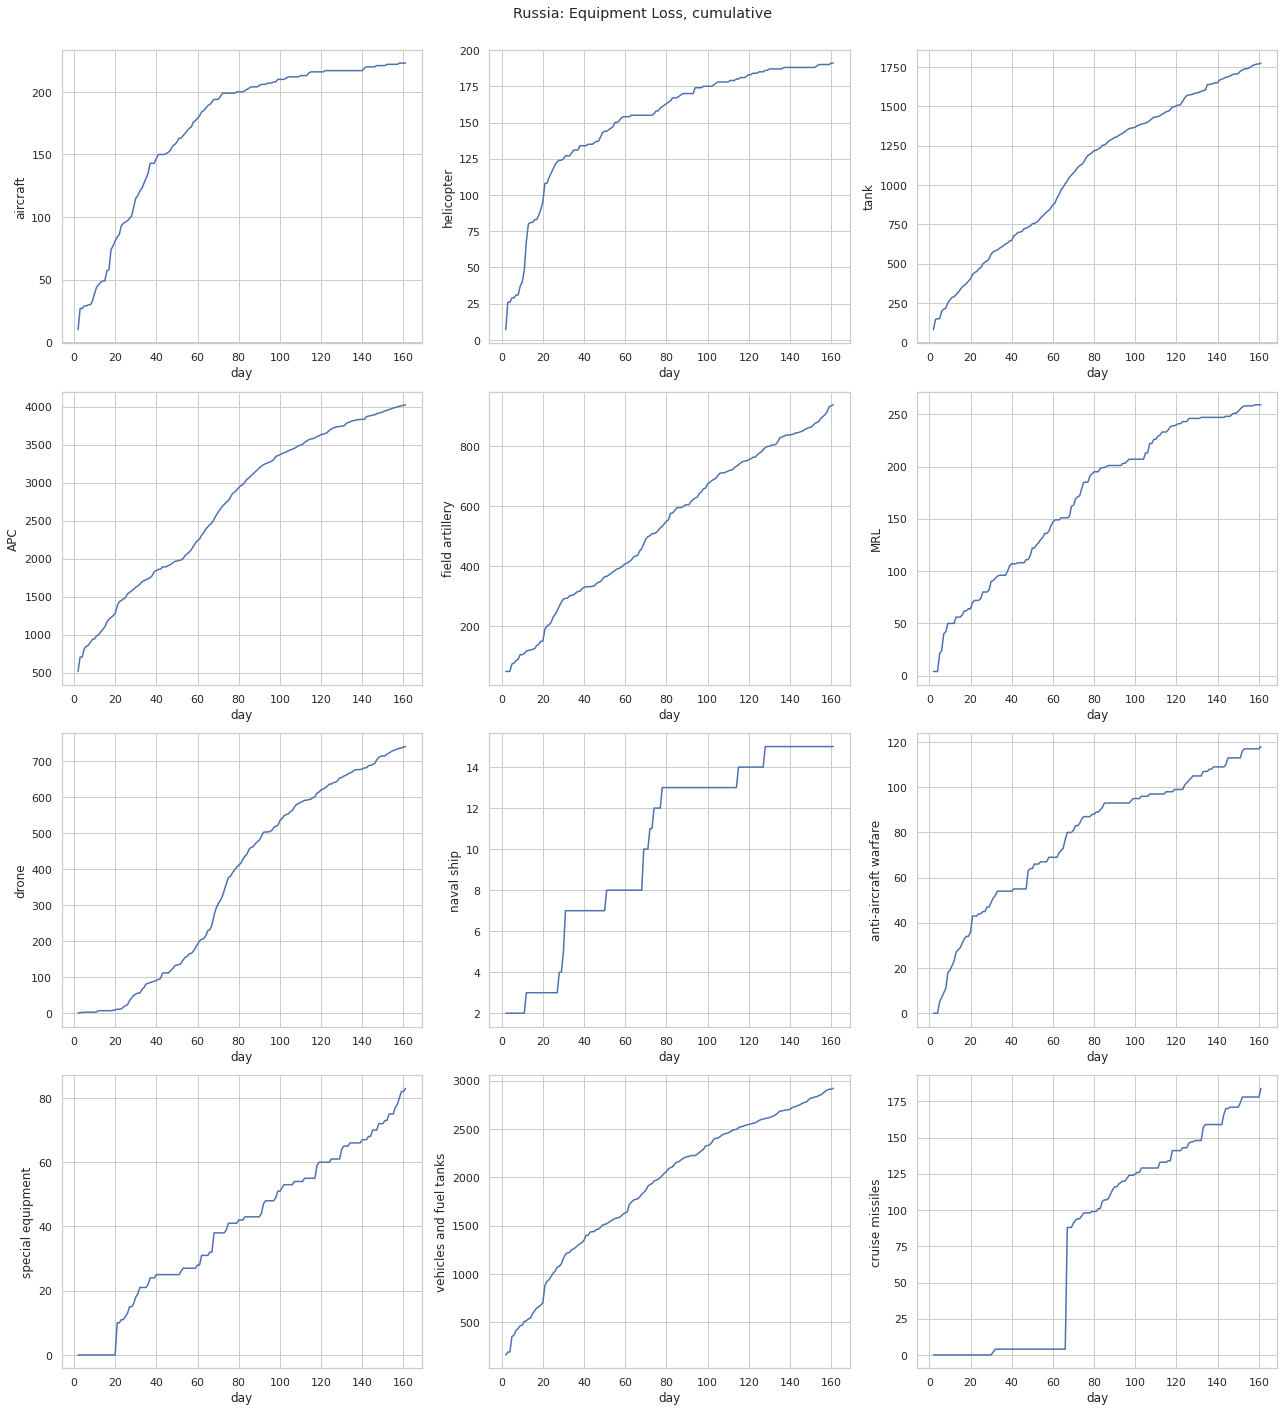

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20))

fig.suptitle('Russia: Equipment Loss, cumulative')
 
sns.lineplot(ax=axes[0, 0], data=df_equipment_loss, x='day', y='aircraft')
sns.lineplot(ax=axes[0, 1], data=df_equipment_loss, x='day', y='helicopter')
sns.lineplot(ax=axes[0, 2], data=df_equipment_loss, x='day', y='tank')
sns.lineplot(ax=axes[1, 0], data=df_equipment_loss, x='day', y='APC')
sns.lineplot(ax=axes[1, 1], data=df_equipment_loss, x='day', y='field artillery')
sns.lineplot(ax=axes[1, 2], data=df_equipment_loss, x='day', y='MRL')
sns.lineplot(ax=axes[2, 0], data=df_equipment_loss, x='day', y='drone')
sns.lineplot(ax=axes[2, 1], data=df_equipment_loss, x='day', y='naval ship')
sns.lineplot(ax=axes[2, 2], data=df_equipment_loss, x='day', y='anti-aircraft warfare')
sns.lineplot(ax=axes[3, 0], data=df_equipment_loss, x='day', y='special equipment')
sns.lineplot(ax=axes[3, 1], data=df_equipment_loss, x='day', y='vehicles and fuel tanks')
sns.lineplot(ax=axes[3, 2], data=df_equipment_loss, x='day', y='cruise missiles')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

print("As of", df_equipment_loss["date"].iloc[-1], "Russia has lost the following equipment: \n-",df_equipment_loss["aircraft"].iloc[-1], "aircrafts\n-", df_equipment_loss["helicopter"].iloc[-1], "helicopters\n-", df_equipment_loss["tank"].iloc[-1], "tanks\n-",df_equipment_loss["APC"].iloc[-1], "APCs\n-", df_equipment_loss["field artillery"].iloc[-1], "field artilleries\n-", df_equipment_loss["MRL"].iloc[-1], "MRLs\n-", df_equipment_loss["drone"].iloc[-1], "drones\n-", df_equipment_loss["naval ship"].iloc[-1], "naval ships\n-", df_equipment_loss["anti-aircraft warfare"].iloc[-1], "anti-aircraft warfares\n-", df_equipment_loss["special equipment"].iloc[-1], "special equipments\n-", df_equipment_loss["vehicles and fuel tanks"].iloc[-1], "vehicles and fuel tanks\n-", df_equipment_loss["cruise missiles"].iloc[-1], "cruise missiles")